In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('../rawdata/winequality-white.csv',
                   names=['fixed acidity',
                         'volatile acidity',
                         'citric acid',
                         'residual sugar',
                         'chorides',
                         'free sulphur dioxide',
                         'total sulphur dioxide',
                         'density',
                         'ph',
                         'sulphates',
                         'alcohol',
                         'quality'
                        ],
                   skiprows=1,
                   sep=r'\s*;\s*',
                   engine='python'
                  )

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chorides,free sulphur dioxide,total sulphur dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# possible score for wine quality

data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [7]:
x = data.drop('quality', axis=1)
y = data['quality']

from sklearn import preprocessing
x = preprocessing.scale(x)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1', dual=False, tol=0.001)
clf_svc.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)

In [9]:
accuracy = clf_svc.score(x_test, y_test)
print(accuracy)

0.49183673469387756


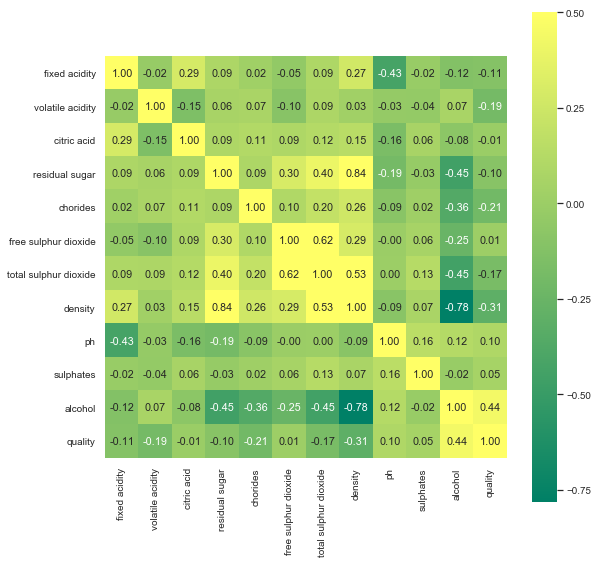

In [14]:

#build heatmap for the model
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, vmax=.5, square=True, annot=True, fmt='.2f', cmap='summer')
plt.show()

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11, whiten=True)  # the number of components can be changed varyingly by reducing it to do away with unwanted dimensions

x_reduced = pca.fit_transform(x)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.2, random_state=0)

clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=0.001)

clf_svc_pca.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)

In [32]:

accuracy = clf_svc_pca.score(x_test, y_test)

print(accuracy)

0.49183673469387756
